# Covid19 - Real Time Monitoring and Analysis
## Realtime data from Folkhälsomyndigheten
Datafile source:
https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data

Realtime data from Folkhalsomyndigheten
https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa

<span style="color:red">Please Notice</span>: The code below can fail to run if Folkhälsomyndigheten changes the format of the excel files provided. Check that the names of the different sheets, columns etc, are correct in case of errors.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette("deep", desat=0.5)
sns.set_style("darkgrid")
base_color = sns.color_palette()[0]
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
xls = pd.ExcelFile('https://www.arcgis.com/sharing/rest/content/items/b5e7488e117749c19881cce45db13f7e/data')
data = pd.read_excel(xls, 'Antal per dag region')
data2 = pd.read_excel(xls, 'Antal avlidna per dag')


# How does the data looks like?

In [41]:
# Data privided by Folkhälsomyndigheten
data.head(10)

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-02-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
Statistikdatum         65 non-null datetime64[ns]
Totalt_antal_fall      65 non-null int64
Blekinge               65 non-null int64
Dalarna                65 non-null int64
Gotland                65 non-null int64
Gävleborg              65 non-null int64
Halland                65 non-null int64
Jämtland_Härjedalen    65 non-null int64
Jönköping              65 non-null int64
Kalmar                 65 non-null int64
Kronoberg              65 non-null int64
Norrbotten             65 non-null int64
Skåne                  65 non-null int64
Stockholm              65 non-null int64
Sörmland               65 non-null int64
Uppsala                65 non-null int64
Värmland               65 non-null int64
Västerbotten           65 non-null int64
Västernorrland         65 non-null int64
Västmanland            65 non-null int64
Västra_Götaland        65 non-null int64
Örebro                 65 n

In [43]:
# Convert Date columns to DateTime if they are not the right format 
#data['Statistikdatum']=pd.to_datetime(data['Statistikdatum'].astype(str), format='%Y/%m/%d')

# To avoid errors in case data is imputed in the wrong format (as in 2020-04-09) Convert Datum column to String format 
#data['Statistikdatum'] = data['Statistikdatum'].astype(str)

In [44]:
# Check if there are any empty cells without values
data.isnull().sum()

Statistikdatum         0
Totalt_antal_fall      0
Blekinge               0
Dalarna                0
Gotland                0
Gävleborg              0
Halland                0
Jämtland_Härjedalen    0
Jönköping              0
Kalmar                 0
Kronoberg              0
Norrbotten             0
Skåne                  0
Stockholm              0
Sörmland               0
Uppsala                0
Värmland               0
Västerbotten           0
Västernorrland         0
Västmanland            0
Västra_Götaland        0
Örebro                 0
Östergötland           0
dtype: int64

In [45]:
# If you get "Null" values in the code above, fill null cells with the value "0"
#data.fillna(0) # <------- In that case uncomment this line.

### Number of Days and Regions recorded

In [46]:
days = data.shape[0]
regions = data.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))


Total number of days recorded: 65
Number of regions: 23


### Count, Mean and Standard Deviations by Region

In [47]:
data.describe()

,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,129.523077,0.569231,3.646154,0.215385,3.215385,2.369231,1.492308,4.153846,0.938462,0.938462,...,55.030769,8.292308,5.815385,1.000000,2.184615,1.276923,3.630769,11.230769,3.538462,12.476923
std,172.188678,1.286580,6.548928,0.649334,5.810799,3.756533,2.681669,6.957978,1.560017,1.666554,...,72.043817,15.192230,9.377320,1.944544,4.050047,2.595114,7.983517,15.470505,7.416361,18.602846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,196.000000,0.000000,5.000000,0.000000,4.000000,3.000000,2.000000,6.000000,1.000000,1.000000,...,99.000000,9.000000,9.000000,1.000000,3.000000,2.000000,3.000000,18.000000,3.000000,27.000000
max,660.000000,6.000000,28.000000,4.000000,30.000000,16.000000,14.000000,32.000000,6.000000,7.000000,...,246.000000,60.000000,38.000000,11.000000,17.000000,13.000000,46.000000,63.000000,42.000000,70.000000


### Correlation > Region - Number of cases
The correlation describes the relation between the number of cases and the region. In this case it's not a cause-effetec correlation because the number of cases does not depend on the region. This correlation table is a descriptive relation that shows in what level from 0 to 1 a region is placed depending on the number of cases registered in the region. I explain more on this in the "Linear view" below.

In [48]:
# Create a data correlation dataframe:
corr_df_master = data.corr()
corr_target = corr_df_master.iloc[0][:] # The correlation target is the 'Totalt_antal_fall' column 
corr = corr_target.sort_values(ascending=True)
corr_df = pd.DataFrame(corr)
corr_df.reset_index(level=0, inplace=True)
corr_df.columns = ['features', 'correlation']
corr_df

,features,correlation
0,Värmland,0.306314
1,Gotland,0.346950
2,Jämtland_Härjedalen,0.368611
3,Skåne,0.436787
4,Blekinge,0.529308
5,Västernorrland,0.701914
6,Kronoberg,0.741175
7,Halland,0.759457
8,Örebro,0.800362
9,Kalmar,0.804240


### Correlations - Linear View
This linear view shows in what level from 0 to 1 a region is placed depending on the number of cases registered in the region. The orange line at the botton shows how the dotted curve should look liken whe the crisis has totally passed. That means no cases in any region. So the dotted line should be flattening and progesively getting lower and aproaching 0. But during the time the virus is active an movin around regions the dotted line could be changing it's form, for example cases lowering in Stockholm but icreasing in another regions. An animation of the development of the curve could be created by comparing data day by day. I'd like to believe that eventually, precdictions could be made  from the movement of the curve.

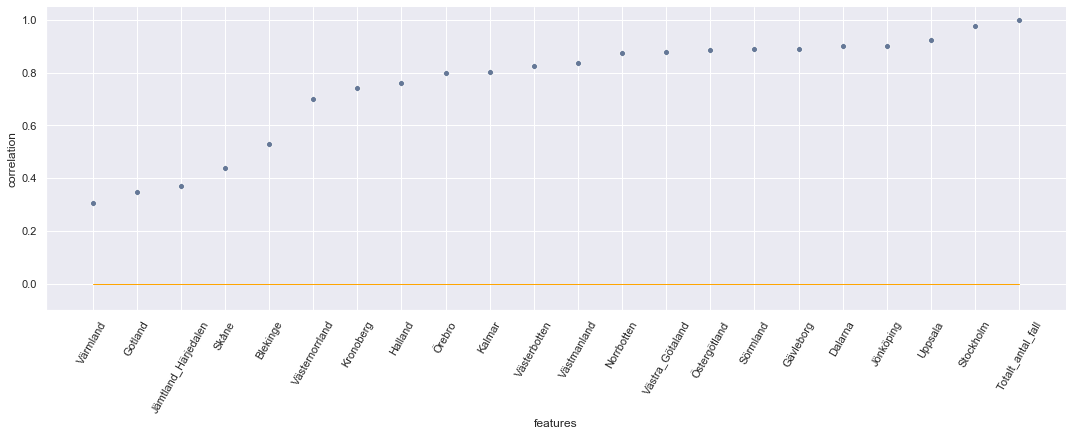

In [49]:
sns.relplot(x='features', y='correlation', data=corr_df, aspect=3)
plt.ylim([-0.1, 1.05]) 
plt.xticks(rotation=60);

# Correlation reference line at y=0
f = len(corr_df.features) -1
plt.plot([0, f], [0, 0], linewidth=1, c='orange');


### Distribution of Correlations
In this graph you can see how the correlation level is distributed and how many regions have the level of correlation from 0 to 1.

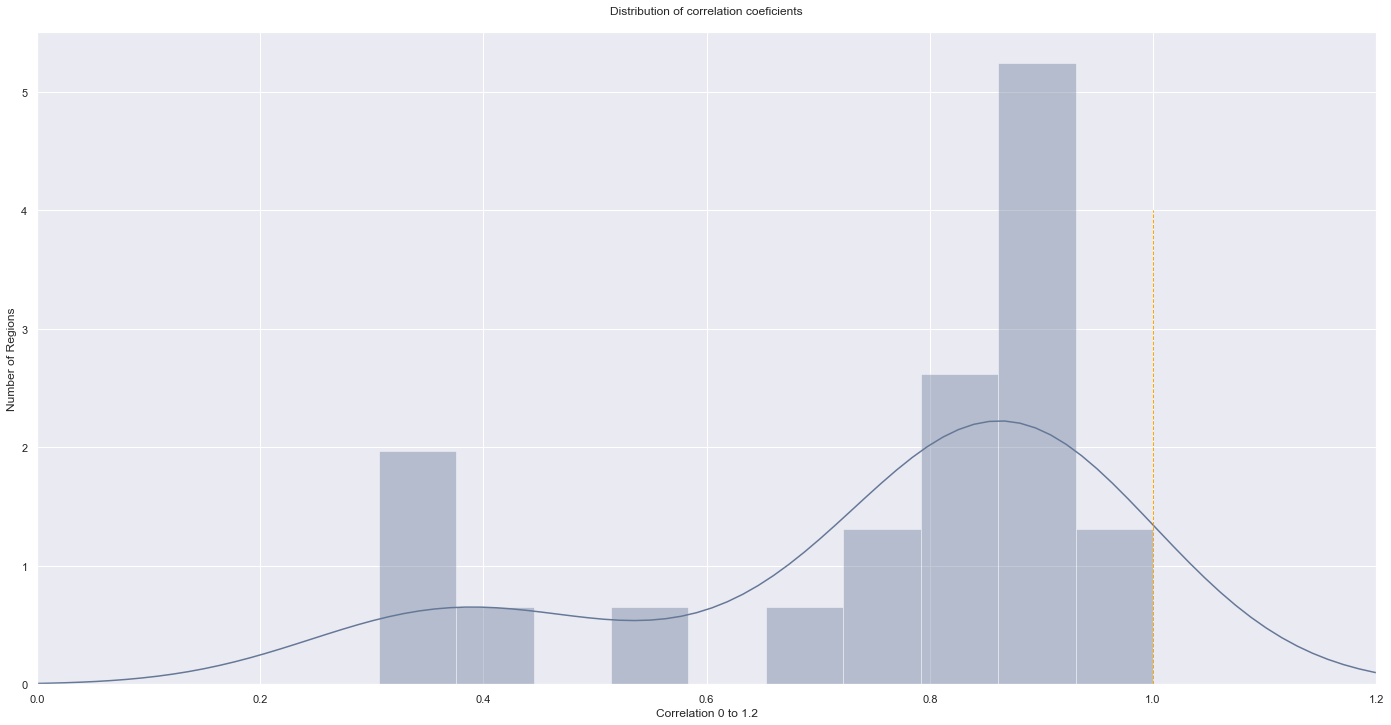

In [68]:
# Observing the distribution of correlation coeficients
fig, ax = plt.subplots(figsize=(24, 12))
sns.distplot(corr_df.correlation, kde=True, bins = 10, ax=ax)
plt.xlim([0, 1.2])
plt.ylabel('Number of Regions')
plt.xlabel('Correlation 0 to 1.2')
ax.set_title("Distribution of correlation coeficients\n");

# Correlation reference line at x=1
plt.plot([1, 1], [0, 4], linewidth=1, c='orange', linestyle='--');

# Affected Cases

### Cases Totals

In [51]:
# Total number of cases
data['Totalt_antal_fall'].sum()

8419

In [52]:
# Mean of cases/region
data['Totalt_antal_fall'].mean()

129.52307692307693

### Amount of Cases by Day

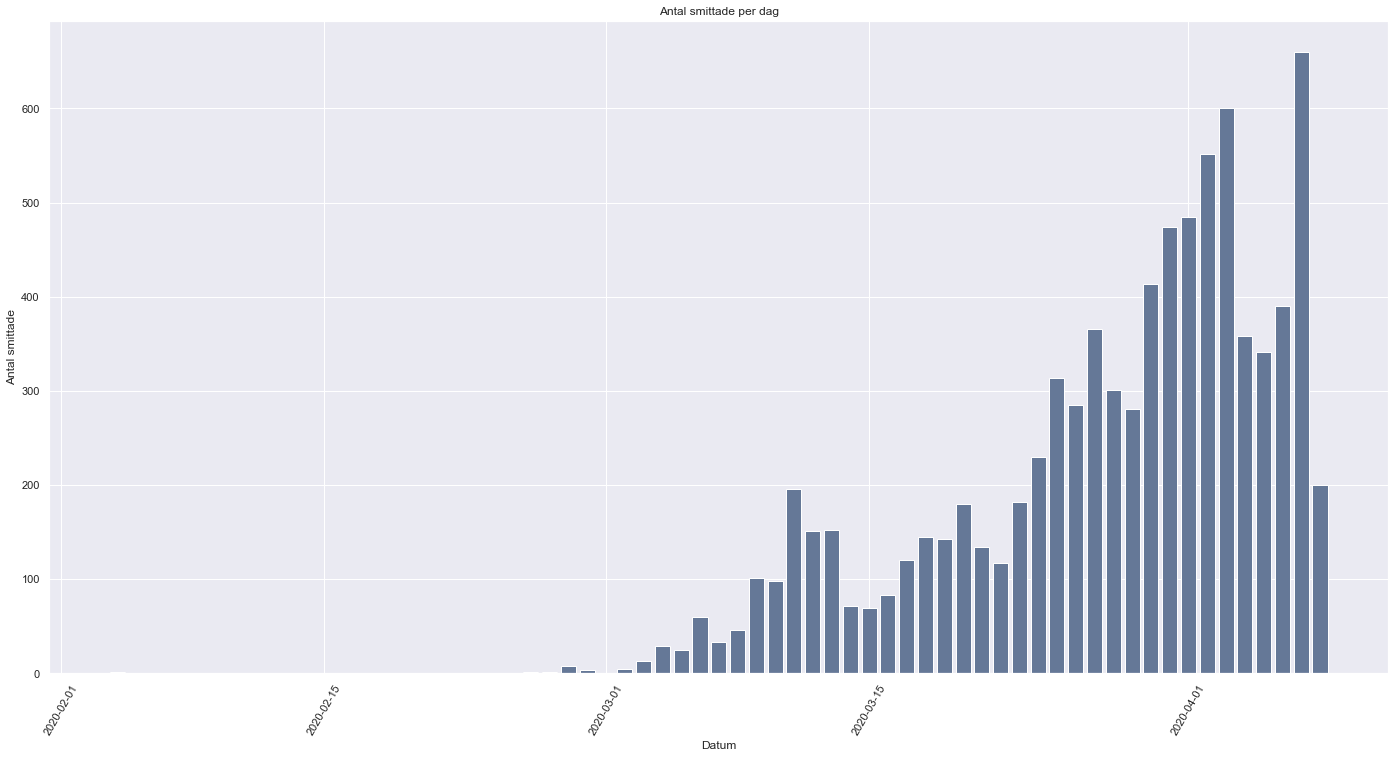

In [53]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data.Statistikdatum.values,
       data['Totalt_antal_fall'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal smittade",
       title="Antal smittade per dag")
plt.xticks(rotation=60);
plt.show()

In [54]:
# For the next step we create a subset with only regions as columns. We call it "region"
region = data.iloc[:, 2:]
region

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,4,18,0,12,2,2,15,1,2,3,...,130,17,11,1,17,6,14,30,3,58
61,1,7,0,7,3,0,12,3,2,2,...,172,27,9,1,9,2,7,30,0,41
62,0,16,0,12,10,4,10,5,3,10,...,130,18,31,2,5,4,18,54,12,39
63,1,28,0,15,13,4,16,4,5,14,...,229,40,37,7,14,10,46,63,42,49


In [55]:
# Columns in the dataset "region"
region.columns.tolist()

['Blekinge',
 'Dalarna',
 'Gotland',
 'Gävleborg',
 'Halland',
 'Jämtland_Härjedalen',
 'Jönköping',
 'Kalmar',
 'Kronoberg',
 'Norrbotten',
 'Skåne',
 'Stockholm',
 'Sörmland',
 'Uppsala',
 'Värmland',
 'Västerbotten',
 'Västernorrland',
 'Västmanland',
 'Västra_Götaland',
 'Örebro',
 'Östergötland']

In [56]:
days = region.shape[0]
regions = region.shape[1] 

print ("Total number of days recorded: {}".format(days))
print ("Number of regions: {}".format(regions))

Total number of days recorded: 65
Number of regions: 21


### Amount of Cases by Region


In [57]:
region = region.sum(axis = 0, skipna = True) 
region = pd.DataFrame(region)
region.reset_index(level=0, inplace=True)
region.columns = ['region', 'cases']
region = region.sort_values(by='cases', ascending=False)
region

,region,cases
11,Stockholm,3577
20,Östergötland,811
18,Västra_Götaland,730
12,Sörmland,539
10,Skåne,381
13,Uppsala,378
6,Jönköping,270
1,Dalarna,237
17,Västmanland,236
19,Örebro,230


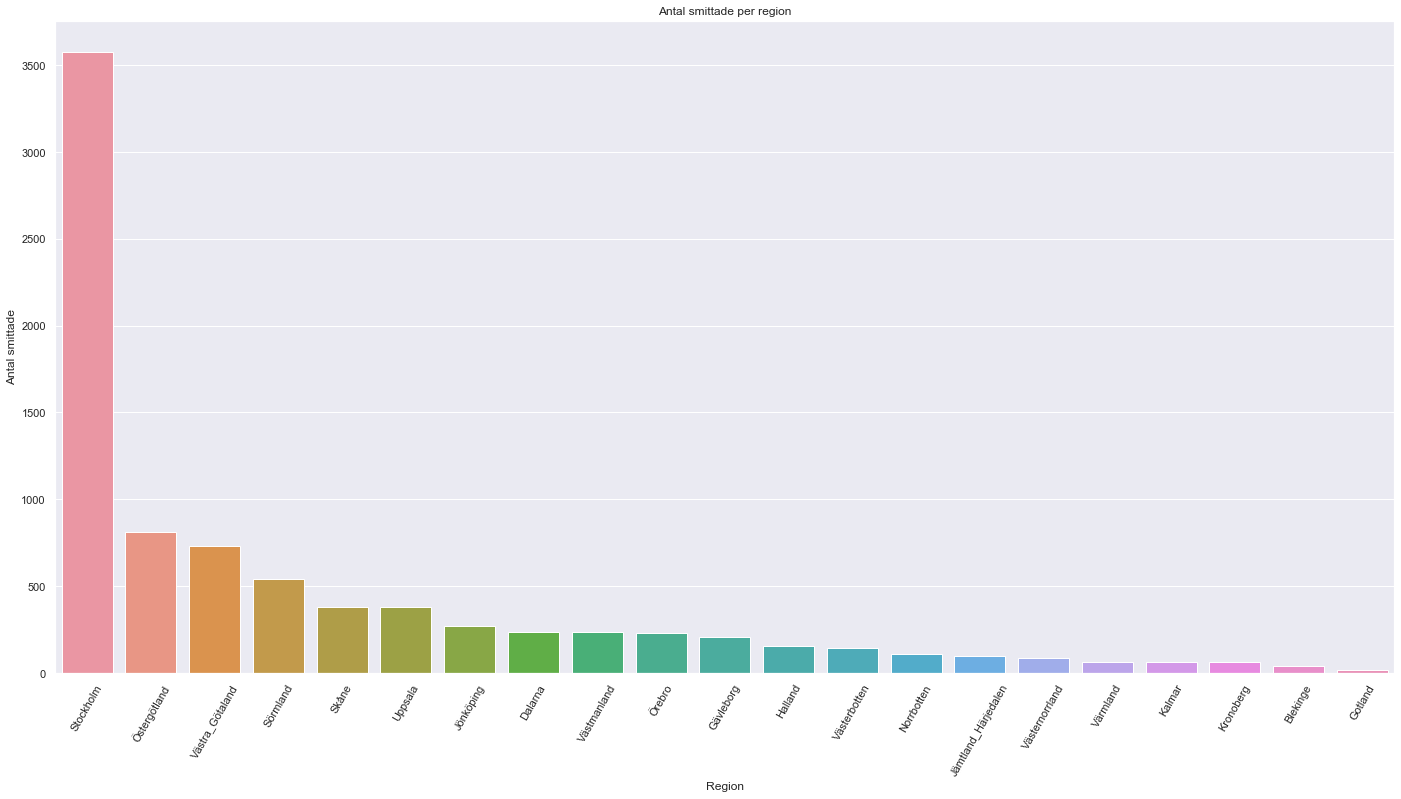

In [58]:
fig, ax = plt.subplots(figsize=(24, 12))
ax = sns.barplot(x="region", y="cases", data=region)
ax.set(xlabel="Region",
       ylabel="Antal smittade",
       title="Antal smittade per region")
plt.xticks(rotation=60);

# Death Cases

In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Datum_avliden    30 non-null object
Antal_avlidna    30 non-null int64
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [60]:
# Convert Date columns to DateTime if they are not the right format 
# data2['Datum_avliden']=pd.to_datetime(data2['Datum_avliden'].astype(str), format='%Y/%m/%d')

# To avoid errors in case data is imputed in the wrong format (as in 2020-04-09) Convert Datum column to String format 
data2['Datum_avliden'] = data2['Datum_avliden'].astype(str)

In [61]:
# Check if there are any empty cells without values
data2.isnull().sum()

Datum_avliden    0
Antal_avlidna    0
dtype: int64

In [62]:
# If you get "Null" values in the code above, fill null cells with the value "0"
#data.fillna(0) # <------- In that case uncomment this line.

In [63]:
data2.head()

,Datum_avliden,Antal_avlidna
0,2020-03-11 00:00:00,1
1,2020-03-12 00:00:00,0
2,2020-03-13 00:00:00,1
3,2020-03-14 00:00:00,1
4,2020-03-15 00:00:00,2


In [64]:
data2.columns.tolist()

['Datum_avliden', 'Antal_avlidna']

### Deaths totals

In [65]:
# Total number of deaths
data2['Antal_avlidna'].sum()

687

In [66]:
# Mean of deaths/region
data2['Antal_avlidna'].mean()

22.9

### Amount of deaths by Day


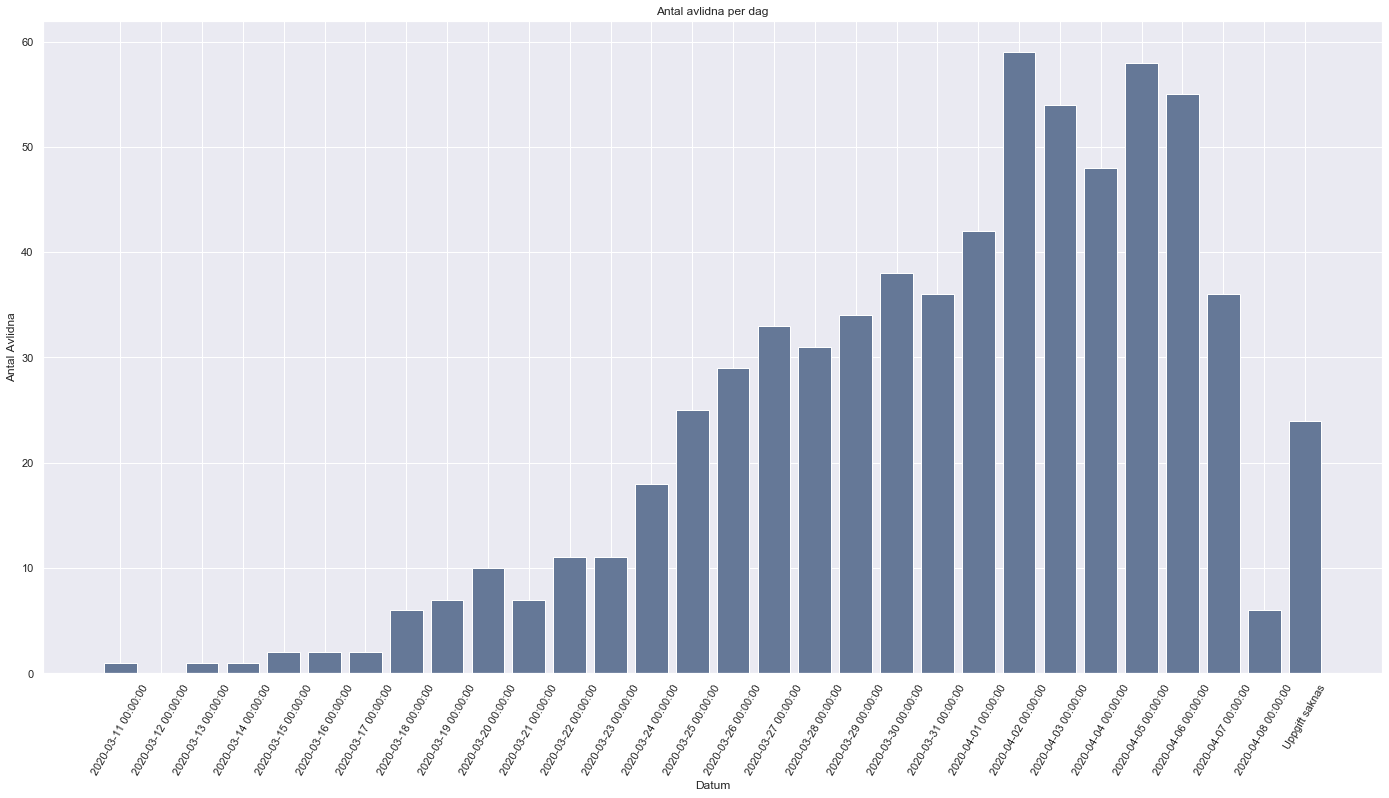

In [67]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(24, 12))

# Add x-axis and y-axis
ax.bar(data2.Datum_avliden.values,
       data2['Antal_avlidna'])

# Set title and labels for axes
ax.set(xlabel="Datum",
       ylabel="Antal Avlidna",
       title="Antal avlidna per dag")
plt.xticks(rotation=60);
plt.show()